In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import isoweek
import requests
import os

In [2]:
data_file_name = "time_series_covid19_confirmed_global.csv"
if not(os.path.isfile(data_file_name)):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/' + data_file_name
    r = requests.get(url, allow_redirects=True)
    open(data_file_name, 'wb').write(r.content)

Nous commençons par télécharger les données pour créer un graphe montrant l’évolution du nombre de cas cumulé au cours du temps pour les pays suivants : la Belgique (Belgium), la Chine - toutes les provinces sauf Hong-Kong (China), Hong Kong (China, Hong-Kong), la France métropolitaine (France), l’Allemagne (Germany), l’Iran (Iran), l’Italie (Italy), le Japon (Japan), la Corée du Sud (Korea, South), la Hollande sans les colonies (Netherlands), le Portugal (Portugal), l’Espagne (Spain), le Royaume-Unis sans les colonies (United Kingdom), les États-Unis (US).

In [3]:
raw_data = pd.read_csv(data_file_name)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

In [4]:
raw_data.drop('Lat', inplace=True, axis=1)
raw_data.drop('Long', inplace=True, axis=1)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

In [5]:
def convert_to_week(date):
    split_date = date.split('/')
    year = int("20" + split_date[2])
    week = int()
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

Désormais on peut trier la liste et sélectionner uniquement les régions et pays qui nous intéressent :

In [6]:
wanted_regions_names = ["Belgium", "China", "France", "Germany", "Iran", "Italy", "Japan", "Korea, South", "Netherlands", "Portugal", "Spain", "United Kingdom", "US"]
regions_tab = pd.DataFrame(raw_data.loc[[(countries in wanted_regions_names) for countries in raw_data['Country/Region']]])
regions_tab

Province/State  Country/Region  1/22/20  \
24                                            NaN         Belgium        0   
59                                          Anhui           China        1   
60                                        Beijing           China       14   
61                                      Chongqing           China        6   
62                                         Fujian           China        1   
63                                          Gansu           China        0   
64                                      Guangdong           China       26   
65                                        Guangxi           China        2   
66                                        Guizhou           China        1   
67                                         Hainan           China        4   
68                                          Hebei           China        1   
69                                   Heilongjiang           China        0   
70                                          Henan           China        5   
71                                      Hong Kong           China        0   
72                                          Hubei           China      444   
73                                          Hunan           China        4   
74                                 Inner Mongolia           China        0   
75                                        Jiangsu           China        1   
76                                        Jiangxi           China        2   
77                                          Jilin           China        0   
78                                       Liaoning           China        2   
79                                          Macau           China        1   
80                                        Ningxia           China        1   
81                                        Qinghai           China        0   
82                                        Shaanxi           China        0   
83                                       Shandong           China        2   
84                                       Shanghai           China        9   
85                                         Shanxi           China        1   
86                                        Sichuan           China        5   
87                                        Tianjin           China        4   
..                                            ...             ...      ...   
130                             Wallis and Futuna          France        0   
131                                           NaN          France        0   
135                                           NaN         Germany        0   
150                                           NaN            Iran        0   
154                                           NaN           Italy        0   
156                                           NaN           Japan        2   
162                                           NaN    Korea, South        1   
196                                         Aruba     Netherlands        0   
197              Bonaire, Sint Eustatius and Saba     Netherlands        0   
198                                       Curacao     Netherlands        0   
199                                  Sint Maarten     Netherlands        0   
200                                           NaN     Netherlands        0   
218                                           NaN        Portugal        0   
241                                           NaN           Spain        0   
260                                           NaN              US        1   
264                                      Anguilla  United Kingdom        0   
265                                       Bermuda  United Kingdom        0   
266                        British Virgin Islands  United Kingdom        0   
267                                Cayman Islands  United Kingdom        0   
268                               Channel Islands  United

On supprime maintenant les lignes inutiles (où on a 0 cas de virus au total) :

In [7]:
regions_tab = pd.DataFrame(regions_tab.loc[regions_tab.iloc[:,-1] != 0])
regions_tab

Province/State  Country/Region  1/22/20  \
24                                            NaN         Belgium        0   
59                                          Anhui           China        1   
60                                        Beijing           China       14   
61                                      Chongqing           China        6   
62                                         Fujian           China        1   
63                                          Gansu           China        0   
64                                      Guangdong           China       26   
65                                        Guangxi           China        2   
66                                        Guizhou           China        1   
67                                         Hainan           China        4   
68                                          Hebei           China        1   
69                                   Heilongjiang           China        0   
70                                          Henan           China        5   
71                                      Hong Kong           China        0   
72                                          Hubei           China      444   
73                                          Hunan           China        4   
74                                 Inner Mongolia           China        0   
75                                        Jiangsu           China        1   
76                                        Jiangxi           China        2   
77                                          Jilin           China        0   
78                                       Liaoning           China        2   
79                                          Macau           China        1   
80                                        Ningxia           China        1   
81                                        Qinghai           China        0   
82                                        Shaanxi           China        0   
83                                       Shandong           China        2   
84                                       Shanghai           China        9   
85                                         Shanxi           China        1   
86                                        Sichuan           China        5   
87                                        Tianjin           China        4   
..                                            ...             ...      ...   
129                                     St Martin          France        0   
130                             Wallis and Futuna          France        0   
131                                           NaN          France        0   
135                                           NaN         Germany        0   
150                                           NaN            Iran        0   
154                                           NaN           Italy        0   
156                                           NaN           Japan        2   
162                                           NaN    Korea, South        1   
196                                         Aruba     Netherlands        0   
197              Bonaire, Sint Eustatius and Saba     Netherlands        0   
198                                       Curacao     Netherlands        0   
199                                  Sint Maarten     Netherlands        0   
200                                           NaN     Netherlands        0   
218                                           NaN        Portugal        0   
241                                           NaN           Spain        0   
260                                           NaN              US        1   
264                                      Anguilla  United Kingdom        0   
265                                       Bermuda  United Kingdom        0   
266                        British Virgin Islands  United Kingdom        0   
267                                Cayman Islands  United

In [8]:
def fusion_regions_with_province_exception_keeping(df, region, exception):
    tab = df.values.tolist()
    lines_len = len(tab[0])
    total = [0] * (lines_len - 2)
    areas_to_delete = []
    for i in range(len(tab)):
        if tab[i][1] == region and (exception == "" or exception != tab[i][0]):
            values = tab[i]
            areas_to_delete.append((tab[i][1], tab[i][0]))
            for j in range(2, lines_len):
                total[j-2] += values[j]
        elif exception == tab[i][0]:
            areas_to_delete.append((tab[i][1], tab[i][0]))
            tab.append(["All", tab[i][0]] + tab[i][2:])
    for area in areas_to_delete:
        for i in range(len(tab)):
            if (tab[i][1], tab[i][0]) == area:
                del tab[i]
                break
    tab.append(["All", region] + total)
    df = pd.DataFrame(tab)
    return df

In [9]:
regions_tab = fusion_regions_with_province_exception_keeping(regions_tab, "China", "Hong Kong")
regions_tab

0               1     2     3     \
0                                            NaN         Belgium     0     0   
1                                  French Guiana          France     0     0   
2                               French Polynesia          France     0     0   
3                                     Guadeloupe          France     0     0   
4                                     Martinique          France     0     0   
5                                        Mayotte          France     0     0   
6                                  New Caledonia          France     0     0   
7                                        Reunion          France     0     0   
8                               Saint Barthelemy          France     0     0   
9                      Saint Pierre and Miquelon          France     0     0   
10                                     St Martin          France     0     0   
11                             Wallis and Futuna          France     0     0   
12                                           NaN          France     0     0   
13                                           NaN         Germany     0     0   
14                                           NaN            Iran     0     0   
15                                           NaN           Italy     0     0   
16                                           NaN           Japan     2     2   
17                                           NaN    Korea, South     1     1   
18                                         Aruba     Netherlands     0     0   
19              Bonaire, Sint Eustatius and Saba     Netherlands     0     0   
20                                       Curacao     Netherlands     0     0   
21                                  Sint Maarten     Netherlands     0     0   
22                                           NaN     Netherlands     0     0   
23                                           NaN        Portugal     0     0   
24                                           NaN           Spain     0     0   
25                                           NaN              US     1     1   
26                                      Anguilla  United Kingdom     0     0   
27                                       Bermuda  United Kingdom     0     0   
28                        British Virgin Islands  United Kingdom     0     0   
29                                Cayman Islands  United Kingdom     0     0   
30                   Falkland Islands (Malvinas)  United Kingdom     0     0   
31                                     Gibraltar  United Kingdom     0     0   
32                                      Guernsey  United Kingdom     0     0   
33                                   Isle of Man  United Kingdom     0     0   
34                                        Jersey  United Kingdom     0     0   
35                                    Montserrat  United Kingdom     0     0   
36                              Pitcairn Islands  United Kingdom     0     0   
37  Saint Helena, Ascension and Tristan da Cunha  United Kingdom     0     0   
38                      Turks and Caicos Islands  United Kingdom     0     0   
39                                           NaN  United Kingdom     0     0   
40                                           All       Hong Kong     0     2   
41                                           All           China   548   641   

    4     5     6     7     8     9       ...         1029      1030  \
0      0     0     0     0     0     0    ...      4624251   4624251   
1      0     0     0     0     0     0    ...        94309     94421   
2      0     0     0     0     0     0    ...        76797     76827   
3      0     0     0     0     0     0    ...       196270    197105   
4      0     0     0     0     0     0    ...       223728    223877   
5      0     0     0     0     0     0    ...        40415     40415   
6      0     0     0     0     0     0    ...        74577     74682   
7      0     0     0     0 

In [10]:
def fusion_regions_with_province_exception_deleting(df, region, exception):
    tab = df.values.tolist()
    lines_len = len(tab[0])
    total = [0] * (lines_len - 2)
    areas_to_delete = []
    for i in range(len(tab)):
        if tab[i][1] == region and (exception == "" or (exception != tab[i][0] and (exception != "*" or tab[i][0] != tab[i][0]))):
            values = tab[i]
            areas_to_delete.append((tab[i][1], tab[i][0]))
            for j in range(2, lines_len):
                total[j-2] += values[j]
        elif tab[i][1] != region:
            pass
        elif exception == "*" and tab[i][0] == tab[i][0]:
            areas_to_delete.append((tab[i][1], tab[i][0]))
        elif exception == tab[i][0]:
            areas_to_delete.append((tab[i][1], tab[i][0]))
    for area in areas_to_delete:
        for i in range(len(tab)):
            if (tab[i][1], tab[i][0]) == area:
                del tab[i]
                break
    tab.append(["All", region] + total)
    df = pd.DataFrame(tab)
    return df

In [11]:
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "France", "*")
regions_tab

0               1     2     3     \
0                                            NaN         Belgium     0     0   
1                                            NaN         Germany     0     0   
2                                            NaN            Iran     0     0   
3                                            NaN           Italy     0     0   
4                                            NaN           Japan     2     2   
5                                            NaN    Korea, South     1     1   
6                                          Aruba     Netherlands     0     0   
7               Bonaire, Sint Eustatius and Saba     Netherlands     0     0   
8                                        Curacao     Netherlands     0     0   
9                                   Sint Maarten     Netherlands     0     0   
10                                           NaN     Netherlands     0     0   
11                                           NaN        Portugal     0     0   
12                                           NaN           Spain     0     0   
13                                           NaN              US     1     1   
14                                      Anguilla  United Kingdom     0     0   
15                                       Bermuda  United Kingdom     0     0   
16                        British Virgin Islands  United Kingdom     0     0   
17                                Cayman Islands  United Kingdom     0     0   
18                   Falkland Islands (Malvinas)  United Kingdom     0     0   
19                                     Gibraltar  United Kingdom     0     0   
20                                      Guernsey  United Kingdom     0     0   
21                                   Isle of Man  United Kingdom     0     0   
22                                        Jersey  United Kingdom     0     0   
23                                    Montserrat  United Kingdom     0     0   
24                              Pitcairn Islands  United Kingdom     0     0   
25  Saint Helena, Ascension and Tristan da Cunha  United Kingdom     0     0   
26                      Turks and Caicos Islands  United Kingdom     0     0   
27                                           NaN  United Kingdom     0     0   
28                                           All       Hong Kong     0     2   
29                                           All           China   548   641   
30                                           All          France     0     0   

    4     5     6     7     8     9       ...         1029      1030  \
0      0     0     0     0     0     0    ...      4624251   4624251   
1      0     0     0     1     4     4    ...     36080574  36119184   
2      0     0     0     0     0     0    ...      7559001   7559055   
3      0     0     0     0     0     0    ...     23823192  23823192   
4      2     2     4     4     7     7    ...     23241410  23341236   
5      2     2     3     4     4     4    ...     26290877  26357464   
6      0     0     0     0     0     0    ...        43423     43423   
7      0     0     0     0     0     0    ...        11490     11490   
8      0     0     0     0     0     0    ...        45507     45507   
9      0     0     0     0     0     0    ...        10931     10931   
10     0     0     0     0     0     0    ...      8528384   8531316   
11     0     0     0     0     0     0    ...      5532964   5532964   
12     0     0     0     0     0     0    ...     13551539  13551539   
13     2     2     5     5     5     6    ...     98054070  98113463   
14     0     0     0     0     0     0    ...         3904      3904   
15     0     0     0     0     0     0    ...        18428     18428   
16     0     0     0     0     0     0    ...         7305      7305   
17     0     0     0     0     0     0    ...        31194     31194   
18     0     0     0     0     0     0    ...         1930      1930   
19     0     0     0     0     0     0    .

In [12]:
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Netherlands", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Belgium", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Germany", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Iran", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Italy", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "United Kingdom", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Japan", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Korea, South", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Portugal", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "Spain", "*")
regions_tab = fusion_regions_with_province_exception_deleting(regions_tab, "US", "*")
regions_tab

0               1     2     3     4     5     6     7     8     9     \
0   All       Hong Kong     0     2     2     5     8     8     8    10   
1   All           China   548   641   918  1401  2067  2869  5501  6077   
2   All          France     0     0     2     3     3     3     4     5   
3   All     Netherlands     0     0     0     0     0     0     0     0   
4   All         Belgium     0     0     0     0     0     0     0     0   
5   All         Germany     0     0     0     0     0     1     4     4   
6   All            Iran     0     0     0     0     0     0     0     0   
7   All           Italy     0     0     0     0     0     0     0     0   
8   All  United Kingdom     0     0     0     0     0     0     0     0   
9   All           Japan     2     2     2     2     4     4     7     7   
10  All    Korea, South     1     1     2     2     3     4     4     4   
11  All        Portugal     0     0     0     0     0     0     0     0   
12  All           Spain     0     0     0     0     0     0     0     0   
13  All              US     1     1     2     2     5     5     5     6   

      ...         1029      1030      1031      1032      1033      1034  \
0     ...      1992218   1998169   2004825   2012877   2020885   2028945   
1     ...      1137641   1155236   1195210   1197482   1221385   1266847   
2     ...     36145223  36193559  36227341  36260475  36297077  36297077   
3     ...      8528384   8531316   8531316   8531316   8534013   8534013   
4     ...      4624251   4624251   4624251   4627186   4627186   4627186   
5     ...     36080574  36119184  36152490  36180077  36205405  36205405   
6     ...      7559001   7559055   7559055   7559164   7559211   7559258   
7     ...     23823192  23823192  23823192  23823192  24031538  24031538   
8     ...     23954192  23954192  23954192  23977633  23977633  23977633   
9     ...     23241410  23341236  23448938  23540544  23626318  23716205   
10    ...     26290877  26357464  26412901  26462319  26512754  26558765   
11    ...      5532964   5532964   5532964   5532964   5537108   5537108   
12    ...     13551539  13551539  13551539  13551539  13573721  13573721   
13    ...     98054070  98113463  98197743  98251350  98306970  98311573   

        1035      1036      1037      1038  
0    2036681   2043967   2051106   2059091  
1    1292852   1320448   1322401   1378017  
2   36297077  36365135  36429599  36478787  
3    8534013   8534013   8536718   8536718  
4    4627186   4627186   4629552   4629552  
5   36205405  36247081  36280371  36318461  
6    7559296   7559368   7559416   7559446  
7   24031538  24031538  24031538  24031538  
8   23977633  23977633  23977633  23977633  
9   23793927  23836351  23957587  24090948  
10  26581856  26654729  26725053  26784142  
11   5537108   5537108   5537108   5537108  
12  13573721  13573721  13573721  13573721  
13  98314841  98357398  98392076  98503462  

[14 rows x 1039 columns]

In [55]:
def fusion_days_into_weeks(df):
    old_header = df.columns.values
    old_values = df.values.tolist()
    result = {}
    for i in range(2, len(old_header)):
        day = str(old_header[i]).split("/")
        week = isoweek.Week.withdate(date(int("20" + day[2]), int(day[0]), int(day[1])))
        if not week in result:
            result[week] = [old_values[j][i] for j in range(0, len(old_values))]
        else:
            for j in range(0, len(old_values)):
                try:
                    result[week][j] = int(old_values[j][i])
                except:
                    pass
    df = pd.DataFrame.from_dict(result, orient='index')
    return df

In [71]:
regions_tab.columns = raw_data.columns.values
df = fusion_days_into_weeks(regions_tab)
df.columns = [regions_tab.values[i][1] for i in range(len(regions_tab.values))]

<Figure size 432x288 with 0 Axes>

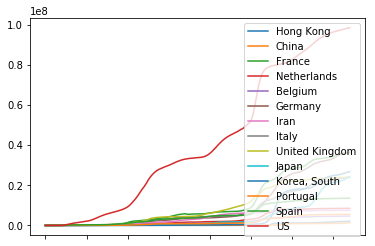

In [72]:
plt.figure();

df.plot();